#  <center>  Moč pri izmeničnih signalih  </center>
<br>
<center>Dejan Križaj, 2019</center>



**Namen:** Zvezek (Notebook) je namenjen seznanjanju študentov z uporabo Jupytra za razumevanje in analizo moči na elementih vezja ali celotnem vezju pri vzbujanju z izmeničnimi signali.

Moč na elementih vezja ali celotnem vezju pri vzbujanju z izmeničnimi pojavi obravnavamo na dva načina. Najprej nas zanima, kako se moč spreminja s časom, kjer razpoznamo tri pojme: delovna moč, jalova moč in navidezna moč. Te pojme pa lahko obravnavamo tudi z analizo vezja s kompleksnim računom. Dobro je razumeti oba koncepta.

**Prej bi lahko predelal tudi:**
* O obravnavi vezij vzbujanih z izmeničnimi signali s kompleksnim računom
* O obravnavi resonančnih vezij

<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

## Teorija - supernakratko

Vzemimo poljuben dvopol (vezje z dvema sponkama), ki vsebuje poljubno vezavo uporov, kondenzatorjev in tuljav. <img src="https://raw.githubusercontent.com/osnove/Slike/master/moc_1.png" style="height:120px">
Ta dvopol vzbujamo s tokom in merimo napetost na zunanjih sponkah - ali pa obratno. (Trenutna) moč (ki se "troši") na dvopolu je definirana kot


$$p(t)=u(t)i(t)$$.

Ta definicija velja za popolnoma splošen vzbujalni signal, nas pa v tem zvezku zanima le moč na dvopolu pri vzbujanju z izmeničnim signalom. Če na primer vzbujamo dvopol z napetostjo 
$u(t)=U_m \sin(\omega t)$, bo tok v dvopol oblike $i(t)=I_m \sin(\omega t-\varphi)$. Ohrani se torej frekvenca signala, ki ima določeno amplitudo in je fazno zamaknjen glede na vzbujalni signal. Če je $\varphi=0$ deluje dvopol navzven kot ohmsko breme (morda tudi je, ni pa nujno, glej resonančni pojav), če je $\varphi=\pi/2$ tok zaostaja za napetostjo, dvopol je tuljava, če pa je $\varphi=-\pi/2$, je pa kondenzator. 

Trenutna moč (moč kot funkcija časa) za poljuben dvopol vzbujan z izmeničnim signalom je torej

$$p(t)=u(t)\cdot i(t)={{U}_{m}}\sin (\omega t)\cdot {{I}_{m}}\sin (\omega t-\varphi )$$.

Ta oblika nam že zadošča, da grafično analiziramo moč pri izmeničnih pojavih. Preprosto zapišemo dva signala, ju zmnožimo in prikažemo na grafu.


In [75]:
## Vnos potrebnih knjižnic (modulov)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

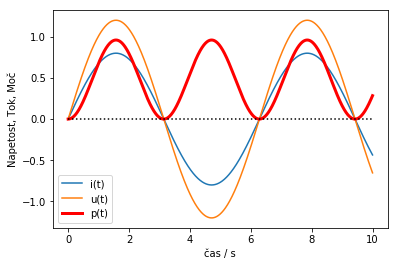

In [76]:
## Izracun in izris toka, napetosti in moči
Im=0.8
Um=1.2
omega=1
fi=0 #np.pi/4 #np.pi
t=np.linspace(0,10*omega,1000)

u=Um*np.sin(omega*t)
i=Im*np.sin(omega*t-fi)
p=u*i

plt.figure()
plt.xlabel('čas / s')
plt.ylabel('Napetost, Tok, Moč')
plt.plot(t,i,label='i(t)')
plt.plot(t,u,label='u(t)')
plt.plot(t,p,label='p(t)',linewidth=3,color='r')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()


**Ugotovitve:** Ker je fazni kot 0, gre seveda za ohmsko breme. Tok in napetost sta v fazi, moč je vseskozi pozitivna in niha z dvojno frekvenco vzbujalnega signala. Zanima nas povprečna vrednost moči, ki je ravno na polovici zmnožka obeh amplitud, torej $P=\frac{U_m I_m}{2} $. Toda ta enačba velja le za $\varphi =0$. 

**Zdaj pa ti:** Ponovno zaženi zgornjo celico za $\varphi =\pi/2$ in $\varphi =-\pi/2$. 
Ugotovimo, da tok zaostaja ali prehiteva napetost za $\varphi =\pi/2$, trenutna moč še vedno niha z dvojno frkevenco signala, je pa v povprečju enaka 0 (niha okoli ničle). Kako je lahko moč negativna. Vzemimo primer kondenzatorja: ko sta napetost in tok pozitivna se kondenzator elektri in shranjuje energijo v električnem polju. Ko pa je napetost negativna in tok pozitiven ali obratno, pa se kondenzator prazni, moč je negativna, energija polja se manjša. To se zgodi 2x v periodi signala, v polovici periode se kondenzator polni in prazni na + napetost, v drugi polovici na na - napetost. Pri idealnem kondenzatorju ni izgube moči oz. energije, ta se le gradi in ruši. Enako je pri idealni tuljavi, le da se gradi in ruši magnetno polje. 

**Zdaj pa ti, 2 ič:** Spremeni fazni kot na $\varphi =\pi/4$ ali neko vrednost med 0 in $\pi/2$.Tok še vedno zaostaja za napetostjo, kar pomeni, da ima dvopol induktivni značaj (dvopol lahko vsebuje tudi kondezatorje, vendar pri frekvenci signala prevladuje induktivnost tuljav).  Ugotovimo, da sedaj trenutna moč niha okoli neke povprečne moči, da pa je tudi delno negativna.
Iz grafov težko razberemo zakonitost oz. formulo za izračun povprečne moči, je pa to popolnoma preprosto, če upoštevamo $\sin (\alpha )\cdot \sin (\beta )=\frac{1}{2}\left( \cos (\alpha -\beta )-\cos (\alpha +\beta ) \right)$ in dobimo izraz

$$p(t)=\frac{{{U}_{m}}{{I}_{m}}}{2}\left[ \cos (\varphi )-\cos (2\omega t-\varphi ) \right]$$.


Prvi člen predstavlja enosmerno komponento, ki je hkrati povprečna moč, drugi člen pa nihanje okoli povprečne moči z dvojno frekvenco. Povprečno moč imenujemo tudi DELOVNA MOČ in je v bistvu moč, ki se troši na ohmskih komponentah. Ni ravno nujno, da je to tudi koristna moč, saj lahko  predstavlja tudi izgube. V angleščini jo imenujemo true power (resnična, prava ?).

Delovna moč je torej določena kot $$P=\frac{{{U}_{m}}{{I}_{m}}}{2}\cos (\varphi )$$.

Trenutna moč niha okoli delovne moči z amplitudo $$ S=\frac{U_m I_m}{2} $$, ki jo imenujemo NAVIDEZNA MOČ (ang. apparent power). Ta "navidezna" moč je potrebna za delovanje naprave, ni pa to tista, ki dejansko opravi delo. Mimogrede - navidezno moč ločimo od delovne tudi po enoti. Za navidezno moč uporabimo enoto VA (volt*amper).

(No, pri izjavah o moči naprav je potrebno biti previden. Še posebno pri audio ojačevalcih, kjer se je z leti spremenilo korektno označevanje z navidezno močjo v razne druge domišlijske moči, ki imajo komaj kaj povezave z navidezno kaj šele z delovno močjo. Dandanes brez težav kupine 500 ali 1000 W ojačevalec PMPO, kjer PMPO pomeni Peak Music Power Output. Ta arbitrarna enota, ki nima čisto jasne definicije, nima nobene zveze z navidezno močjo, ki bi bila npr. v konkretnem primeru lahko le 5 ali 10 VA. Več: https://www.audioholics.com/audio-amplifier/amplifier-power-ratings).



### Spreminjamo fazo z vtičnikom

Za boljše spremljanje sprememb trenutne moči ob spremembi faze, uporabimo interaktivni gradnik (vtičnik) (ang. widget) z drsnikom, ki naj omogoča spreminjanje faze od $\varphi =\pi/2$ do $\varphi =-\pi/2$. 



In [77]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

Im=0.8
Um=1.2
omega=1
t=np.linspace(0,10*omega,1000)

u=Um*np.sin(omega*t)

def power(fi):

    i=Im*np.sin(omega*t-fi)
    p=u*i
    P=Um*Im*np.cos(fi)/2
    
    plt.figure(figsize=(10,6))
    plt.xlabel('čas / s')
    plt.ylabel('Napetost, Tok, Moč')
    plt.plot(t,i,label='i(t)')
    plt.plot(t,u,label='u(t)')
    plt.plot(t,p,label='p(t)',linewidth=3,color='r')
    plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
    plt.plot([0, max(t)],[P, P], linestyle='-',color='b') # dodamo črto P
    plt.text(10,P,' P') # dodamo tekst P na koncu črte P
    plt.legend()
    plt.show()

interactive_plot = interactive(power, fi=(-np.pi/2, np.pi/2, np.pi/10))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='fi', max=1.5707963267948966, min=-1.5707963267948966…

### Jalova moč

Poleg delovne in navidezne moči poznamo še eno moč, ki jo imenujemo jalova moč (simbol Q). Ime je morda izbrano nesrečno, ker brez te moči ne bi deloval praktično noben električni aparat. Gre namreč za moč, ki se oblikuje na kondenzatorjih v obliki električnega in v zuljavah v obliki magnetnega polja. Kot smo že ugotovili, je ta moč v povprečju enaka 0. Mora pa obstajati, saj npr. motorji ne bi delovali brez delovanja magnetnega polja (razen takih, ki ne temeljijo na magnetni sili). Pomembna je torej amplituda te moči, ki pa iz časovnega poteka trenutne moči ni direktno razvidna. 

Trenutno moč je potrebno razdeliti na dve moči, eno ki niha okoli ničle in eno, ki je vedno pozitivna. Amplituda prve je JALOVA MOČ, druga pa predstavlja moč, ki se troši na ohmskih komponentah dvopola. Zopet si pomagamo z matematiko, saj velja $\cos (\alpha -\beta )=\cos (\alpha )\cdot \cos (\beta )+\sin (\alpha )\cdot \sin (\beta )$. Torej bo $\cos (2\omega t-\varphi )=\cos (2\omega t)\cdot \cos (\varphi )+\sin (2\omega t)\cdot \sin (\varphi )$. Potem lahko trenutno moč zapišemo v obliki
$$p(t)=\frac{{{U}_{m}}{{I}_{m}}}{2}\left[ \cos (\varphi )\left( 1-\cos (2\omega t) \right)-\sin (\varphi )\sin (2\omega t) \right]=r(t)+q(t)$$.

Predvsem nas zanima drugi člen $q(t)$, ki predstavlja nihanje dela trenutne moči okoli ničle. Amplituda tega člena, ki jo tudi imenujemo JALOVA MOČ, je

$$Q=\frac{{{I}_{m}}{{U}_{m}}}{2}\sin (\varphi )$$.

Prvi člen, $r(t)$ pa predstavlja nihanje okoli delovne moči.

Izrišimo še ta dva signala na grafu. Z vtičnikom, tako kot v prejšnji celici.

In [78]:
Im=0.8
Um=1.2
omega=1
t=np.linspace(0,10*omega,1000)

u=Um*np.sin(omega*t)

def power(fi):

    i=Im*np.sin(omega*t-fi)
    p=u*i
    P=Um*Im*np.cos(fi)/2
    Q=Um*Im*np.sin(fi)/2
    q=-Q*np.sin(2*omega*t)
    r=P*(1-np.cos(2*omega*t))
    
    plt.figure(figsize=(10,6))
    plt.xlabel('čas / s')
    plt.ylabel('Napetost, Tok, Moč')
    plt.plot(t,i,label='i(t)')
    #plt.plot(t,u,label='u(t)')
    plt.plot(t,p,label='p(t)',linewidth=3,color='r')
    plt.plot(t,q,label='q(t)',linestyle=':',linewidth=2,color='g')
    plt.plot(t,r,label='r(t)',linestyle=':',linewidth=2,color='black')
    #plt.plot(t,(r+q),label='r(t)',linewidth=2,color='black')
    plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
    plt.plot([0, max(t)],[P, P], linestyle='-',color='b') # dodamo črto P
    plt.text(10,P,' P') # dodamo tekst P na koncu črte P
    plt.legend()
    plt.show() # razširi po potrebi

interactive_plot = interactive(power, fi=(-np.pi/2, np.pi/2, np.pi/10))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='fi', max=1.5707963267948966, min=-1.5707963267948966…

**Ugotovitve:** Sedaj, ko smo ločili trenutno moč na dve moči, je lepo razvidno, kako se moč dvopola lahko deli na moč, ki se troši na ohmskih elementih in moč, ki niha okoli ničle in je posledica grajenja in rušenja električnega in magnetnega polja v kondenzatorjih in tuljavah.
Še enkrat ponovimo, da je JALOVA MOČ določena kot amplituda moči $q(t)$ in ne kot del signala trenutne moči. 

### Še čisto malo teorije

Če kvadriramo in seštejemo delovno moč $P=\frac{{{U}_{m}}{{I}_{m}}}{2}\cos (\varphi )$ in jalovo moč $Q=\frac{{{U}_{m}}{{I}_{m}}}{2}\sin (\varphi )$ dobimo $(\frac{{{U}_{m}}{{I}_{m}}}{2})^2$, kar je kvadrat navidezne moči. Torej velja

$$S^2=P^2+Q^2 ,$$

kar imenujemo trikotnik moči. Pomembna formula, ki pogosto pride prav. Velja tudi

$P=S\cos (\varphi )$

in

$Q=S\sin (\varphi )$.


### Zdaj pa ti

Bi znal iz poljubnega signala moči razbrati S, P in Q? 
Na primer, v spodnji celici z generatorjem naključnih števil generiramo signal, ti pa dopiši kodo tako, da boš dobil iz analize signala S, P in Q. Pa brez goljufanja! Rešitev je na koncu zvezka.

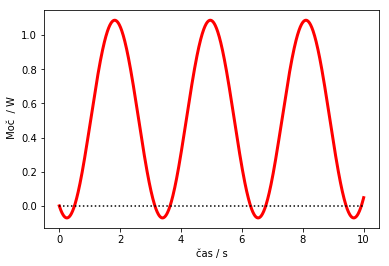

In [79]:
## Random moč
Im=np.random.rand()+0.2 # rand() da v povprečju 0.5
Um=np.random.rand()+0.1
omega=1
fi=np.random.rand()*np.pi/2 # 

t=np.linspace(0,10*omega,1000)
#t=np.linspace(0,3*np.pi/omega,1000)
u=Um*np.sin(omega*t)
i=Im*np.sin(omega*t-fi)
p=u*i

plt.xlabel('čas / s')
plt.ylabel(' Moč  / W')
plt.plot(t,p,label='p(t)',linewidth=3,color='r')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo

## S, P in Q s kompleksnim računom

Navidezno, delovno in jalovo moč vezja vzbujanega z izmeničnim signalom najlažje izračunamo s pomočjo kompleksnega računa. Če skrajšamo teoretični del, izračunamo kompleksno navidezno moč kot

$$\underline S = \frac{1}{2} \underline U_m \, \underline I_m^* ,$$

kjer sta $\underline U_m $ in $\underline I_m $ kompleksor napetosti in toka na zunanjih sponkah vezja. 

Če upoštevamo Ohmov zakon zapisan za izmenične signale $\underline U = \underline Z \, \underline I $, dobimo

$$\underline S =  \frac{1}{2} I_m^2 \underline Z $$

ali tudi 

$$\underline S =  \frac{1}{2} U_m^2 \underline Y^* .$$

Pri uporabi kompleksnega računa je praktično vseeno katero formulo se uporabi, saj je preračunavanje iz impedance v admitanco itd. zelo hitro in enostavno. Če pa se to dela peš, pa je seveda potrebno vzeti izraz, ki omogoča najhitrejšo pot do rešitve.

Včasih je videti formulo zapisano tudi v obliki $\underline S =\underline U \, \underline I^* $, torej brez polovičke. Tudi ta formula je OK, s tem, da sta sedaj kazalca toka in napetosti določena kot efektivni vrednosti.

Če je $\underline U = U_m e^{j\varphi_u}$ in $\underline I = I_m e^{j\varphi_i}$, potem je 
$$\underline S = \frac{1}{2} U_m e^{j\varphi_u}I_m e^{-j\varphi_i}=\frac{1}{2}U_m I_m e^{j(\varphi_u - \varphi_i)}= \frac{1}{2}U_m I_m e^{j\varphi} .$$

Če uporabimo Eulerjev obrazec dobimo $$\underline S = \frac{1}{2} U_m I_m (\cos\varphi-j \sin\varphi) = P +j  Q .$$

Očitno je torej realni del kompleksne moči kar delovna moč, imaginarni del pa jalova moč.



**Primer izračuna navidezne, delovne in jalove moči vezja**

Vzemimo vezje na sliki, ki ga vzbujamo z virom izmenične napetosti $u_g(t)=10 \sin(2000 t)$ V,
kjer je $C=50 \, \mathrm{ \mu F}$, $L=\mathrm{ 2  \,mH}$ in $R = 20 \, \mathrm{\Omega}$. Tuljavi dodajmo zaporedno še ohmsko komponento $ 1 \, \mathrm{\Omega}$.

<img src="https://raw.githubusercontent.com/osnove/Slike/master/impedanca_2.png" style="height:150px" align="left">

In [80]:
## Izračun S, P in Q
C=50e-6
L=2e-3
R=20
U= -1j*10  # množenje z -j ker gre za sinusni signal. Kar se izračuna moči tiče, je sicer vseeno.
omega=2000

Zc=1/(1j*omega*C)
ZL=1j*omega*L+1 # dodamo še 1 ohm
Z=Zc+1/(1/ZL+1/R)

# Sedaj lahko izračunamo tok v vezje in nato S, P in Q
I=U/Z
S=0.5*U*np.conj(I)
P=np.real(S)
Q=np.imag(S)
print(S,P,Q)
# ali pa
S=0.5*(abs(U))**2*np.conj(1/Z)
S

(1.804878048780488-7.2439024390243905j) 1.804878048780488 -7.2439024390243905


(1.804878048780488-7.24390243902439j)

### Moč v odvisnosti od frekvence

Lepota Jupytra je ravno v tem, da enostavno izrišemo grafe in s tem ugotavljamo spreminjanje določene veličine s časom, frekvenco ali kako drugače.

Zgornji izračun lahko ponovimo in prikažemo, kako se S, P in Q spreminjajo s frekvenco vzbujalnega signala.

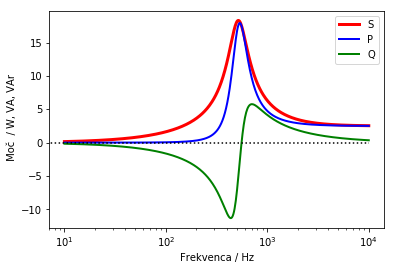

In [81]:
eksponent=np.linspace(1,4,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

Zc=1/(1j*omega*C)
ZL=1j*omega*L+1
Z=Zc+1/(1/ZL+1/R)

# Izračun I, S, P, Q
I=U/Z
S=0.5*U*np.conj(I)
P=np.real(S)
Q=np.imag(S)

plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Moč  / W, VA, VAr')
plt.semilogx(freq,abs(S),label='S',linewidth=3,color='r')
plt.semilogx(freq,P,label='P',linewidth=2,color='b')
plt.semilogx(freq,Q,label='Q',linewidth=2,color='g')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

**Ugotovitve:**
* Očitno pri določeni frekvenci pride do izrazitega povečanja moči na bremenu. Značilno je, da je tedaj jalova moč majhna, kar lahko sklepamo tudi iz enačbe, saj mora biti za največji S največja tudi kompleksna prevodnost oz. najmanjša abs(Z). Ker se ohmske komponente ne spreminjajo s frekvenco, je edina možnost, da se izniči (kompenzira) vpliv induktivne in kapacitivne komponente.
* Ko je abs(S) največji, je tudi največji tok v vezje. Ni pa nujno, da je takrat fazni kot enak nič, torej, da jalove komponente navzven (na zunanjih sponkah) ni zaznati. To bi veljalo za zaporedno RLC vezavo, ne pa tudi za splošno vezje. Je pa običajno blizu ničle.
* Običajno nas bolj kot največja navidezna moč zanima največja delovna moč, še posebno, če ta opravlja koristno delo. Ko je največja max(S) ni nujno največja tudi delovna moč. Že v našem primeru je razvidno, da temu ni tako. Tudi pogoj je nekoliko drugačen, saj je za max delovno moč potrebno maksimirati realno komponento S, torej $Re[\underline Y^*]$. Nastopata pa precej skupaj.

Da bi bolj natančno pogledali vrednosti v okolici max(S) lahko izrišemo tabelo vrednosti frekvence, faznega kota in navidezne moči. To naredimo v spodnji celici, kjer si za lepši prikaz pomagamo z funkcijo DataFrame,ki je del modula Pandas. O njem smo na kratko pisali v drugem zvezku (BeautifulSoup & Pandas).

In [82]:
## Izpis vrednosti S, P in Q okoli maximuma
# Najprej poiščemo indeks niza, ko je moč največja
index_S=np.where(abs(S)==max( abs(S))) # indeksi, kjer je izpolnjen pogoj
res_freq=freq[index_S]
print(res_freq)
print(S[index_S])
print(abs(Z[index_S]))
fi=np.arctan(Q/P)
print(fi[index_S])

# Pripravimo skupne nize za izpis v tabeli
tabela=np.array([freq,fi,abs(S),S,abs(I),abs(Z)])  # tvorim tabelo 
import pandas as pd  # vnos modula Pandas
df = pd.DataFrame(data=tabela.T) # naredim DataFrame s Pandas, tabelo je potrebno tranponirati
df.columns=['freq', 'fi','abs(S)','S','abs(I)','abs(Z)'] # označi stolpce
s1=int(index_S[0]) # pretvorim index v integer
df[s1-10:s1+10] # izrišem DataFrame za vrednosti okoli max(S)

[516.92418739]
[17.55272315-5.23648933j]
[2.72967852]
[-0.28992322]


,freq,fi,abs(S),S,abs(I),abs(Z)
275,450.097513+0.000000j,-0.796012+0.000000j,15.610403+0.000000j,10.920442-11.154758j,3.122081+0.000000j,3.202992+0.000000j
276,456.371628+0.000000j,-0.753586+0.000000j,16.031844+0.000000j,11.691060-10.969920j,3.206369+0.000000j,3.118793+0.000000j
277,462.733201+0.000000j,-0.708939+0.000000j,16.438139+0.000000j,12.477421-10.701700j,3.287628+0.000000j,3.041707+0.000000j
278,469.183451+0.000000j,-0.662130+0.000000j,16.822650+0.000000j,13.267760-10.342539j,3.364530+0.000000j,2.972183+0.000000j
279,475.723614+0.000000j,-0.613269+0.000000j,17.178217+0.000000j,14.047848-9.886815j,3.435643+0.000000j,2.910663+0.000000j
280,482.354943+0.000000j,-0.562517+0.000000j,17.497416+0.000000j,14.801334-9.331671j,3.499483+0.000000j,2.857565+0.000000j
281,489.078709+0.000000j,-0.510094+0.000000j,17.772902+0.000000j,15.510383-8.677792j,3.554580+0.000000j,2.813272+0.000000j
282,495.896201+0.000000j,-0.456277+0.000000j,17.997823+0.000000j,16.156632-7.930000j,3.599565+0.000000j,2.778114+0.000000j
283,502.808725+0.000000j,-0.401391+0.000000j,18.166260+0.000000j,16.722378-7.097542j,3.633252+0.000000j,2.752355+0.000000j
284,509.817606+0.000000j,-0.345807+0.000000j,18.273657+0.000000j,17.191899-6.193959j,3.654731+0.000000j,2.736179+0.000000j


Zgoraj se je izpisala tabel vrednosti freq, fi, abs(S), S in abs(I). Preverite sami, pri katerih pogojih je max(S) ali max(P). 

V spodnji celici izrišemo še tok v vezje v odvisnosti od frekvence. Če želimo, da naš 10 V vir izmenične napetosti ustrezno deluje pri vseh frekvencah, mora hkrati zagotavljati tudi ustrezen tok. Tok bo največji, ko bo abs(Z) najmanjša, to je ko je navidezna moč največja. V konkretnem primeru je največja amplituda toka nekaj čez 3 A. To je tudi tok, ki ga mora zagotavljati vir za pričakovano delovanje. Običajno ponujajo proizvajalci modele, ki zagotavljajo npr. enako moč, vendar pri različnih pogojih. Npr., če pogledamo AC ojačevalnike Toellner https://www.toellner.de/datenblaetter/en_7621.pdf, ugotovimo, da ponujajo 300 W ojačevalnike, ki pa imajo lahko na izhodu max 10 V in 30 A ali max 60 V in 5 A ali max 100 V in 3 A. Torej, za naš konkreten primer ne bi bil primeren ojačevalec 100 V in 3 A, saj potrebujemo za max S ali max P cca. 5 A. Izbira je očitno odvisna od absolutne vrednosti impedance bremena pri želeni frekvenci delovanja, ki mora biti v prvem primeru najmanj $1/3 \,\Omega$, v drugem primeru $15 \,\Omega$ in v tretjem primeru $33 \,\Omega$. 

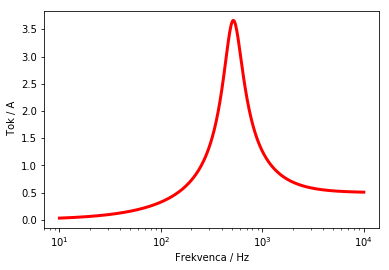

In [83]:
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Tok / A')
plt.semilogx(freq,abs(I),label='Z',linewidth=3,color='r')

## Kompenzacija jalove komponente moči

Jalova komponenta moči nam le  povečuje potrebo po večji izhodni moči. Zmanjšanje jalove moči z ustreznim dodajanjem elementov imenujemo kompenzacija. Ta je lahko popolna, kar pomeni, da bo Q=0 ali pa nepopolna, kjer jo zmanjšamo na nek določen nivo, običajno določen s $\cos \varphi$.
Razlikujemo zaporedno ali vzporedno kompenzacijo, to pomeni, da lahko bremenu vežemo ustrezno impedanco zaporedno ali vzporedno. Morda izgleda na prvi pogled vseeno, ali se opravi vzporedno ali zaporedno komponzacijo vendar to ni res. Razlika je lahko precejšnja, kar lahko spoznamo kar z analizo konkretnega primera. 

### Zaporedna kompenzacijska vezava
Če želimo, da bo breme navzven čisto ohmsko, moramo impedanci vezja zaporedno dodati impedanco, ki bo imela enako veliko a negativno vrednost imaginarnega dela impedance. To seveda pomeni, da bo ostal le še realni del impedance in Q=0.
Naprej izrišimo impedanco ter njen realni in imaginarni del. 

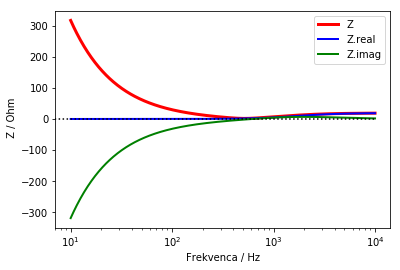

In [84]:
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Z / Ohm')
plt.semilogx(freq,abs(Z),label='Z',linewidth=3,color='r')
plt.semilogx(freq,Z.real,label='Z.real',linewidth=2,color='b')
plt.semilogx(freq,Z.imag,label='Z.imag',linewidth=2,color='g')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

Pri nižjih frekvencah prevladuje negativen imaginaren del impedance, torej prevladuje $-j\frac{1}{\omega C}$. Dokler je imaginarni del negativen, ga je potrebno kompenzirati s pozitivnim členom, torej z $j\omega L$. Ko pa postane imaginaren del pozitiven, ga pa je potrebno kompenzirati z negativno impedanco, torej z $-j\frac{1}{\omega C}$.

To naredimo v spodnji celici, kjer določimo velikosti kompenzacijske tuljave ali kondenzatorja za popolno kompenzacijo.


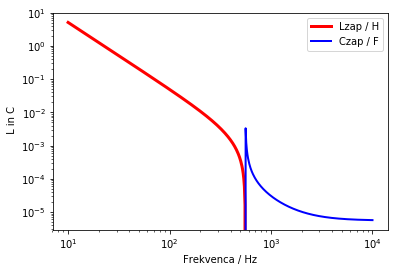

In [85]:
Lzap=-Z.imag/omega
Czap=1/(Z.imag*omega)
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' L in C')
plt.loglog(freq,Lzap,label='Lzap / H',linewidth=3,color='r')
plt.semilogx(freq,Czap,label='Czap / F',linewidth=2,color='b')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

**Ugotovitve:** Pri nižjih frekvencah potrebujemo za popolno kompenzacijo precej veliko induktivnost, ki bi jo v praksi težko realizirali. Kar se tiče prakse je še bolj vprašljivo, če bi imeli na razpolago ustrezen vir, ki bi zagotavljal dovolj toka.  Pa ga izrišimo.


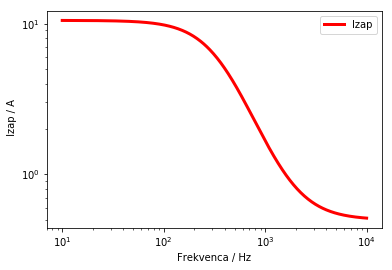

In [86]:
Izap=U/Z.real

plt.figure()
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Izap / A')
plt.loglog(freq,abs(Izap),label='Izap',linewidth=3,color='r')
#plt.loglog(freq,abs(Ivzpo),label='Ivzpo',linewidth=2,color='b')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()
#print(Izap)

Ugotovimo, da bi pri popolni zaporedni kompenzaciji potrebovali vir, ki bi omogočal najmanj 10 A. 
V vezje teče sedaj bistveno večji tok kot brez kompenzacije. To je sicer ugodno, kar se tiče maksimiranja delovne moči, čemur je običajno zaporedna kompenzacija tudi namenjena. Je pa potrebno ponovno preveriti, če imamo na razpolago ustrezne komponente, ki dovoljujejo tako velik tok in tudi napetost. 

Poleg tega moramo ugotoviti, da za vsako frekvenco potrebujemo za popolno kompenzacijo drugo vrednost kondenzatorja ali tuljave. Torej se komponzacije ne da preprosto opraviti kar z enim samim elementom.

Preverimo napetost na kondenzatorju in tok skozi tuljavo pri popolni zaporedni kompenzaciji.

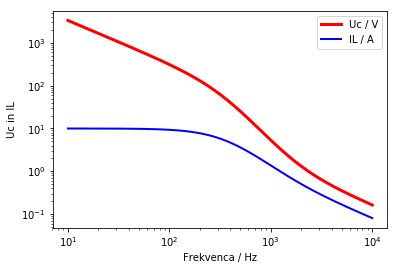

In [87]:
Uc=Izap*Zc
IL=Izap*R/(ZL+R) # tokovni delilnik

plt.figure()
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Uc in IL')
plt.loglog(freq,abs(Uc),label='Uc / V',linewidth=3,color='r')
plt.loglog(freq,abs(IL),label='IL / A',linewidth=2,color='b')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()
#print(Izap)

Ugotovimo, da je napetost na kondenzatorju bistveno povečana v primerjavi z napetostjo generatorja. Pri nizkih frekvencah tudi preko 1000 V, kar bi bilo v praksi potrebno upoštevati. Tuljava mora omogočati najmanj tok 10 A.

### Vzporedna kompenzacijska vezava 
Druga varianta je, da kompenzacijo dosežemo z vzporedno vezavo. V tem primeru gledamo admitanco, katere imaginarni del mora biti enak nič. Ta kompenzacija se zelo pogosto uporablja za zmanjšanje jalove moči naprav, vsaj iz dveh razlogov: 1) zmanjša se tokovna obremenitev vira, saj si vzporedni impedanci izmenjujeta jalovo energijo, navzven deluje pa vezje čisto ohmsko. 2) Zmanjša se porabljena energija, kar se pozna na manjšem računu za elektriko, predvsem za tovarne, kjer je mnogo strojev. 

Najprej si poglejmo admitanco vezja v odvisnosti od frekvence. 

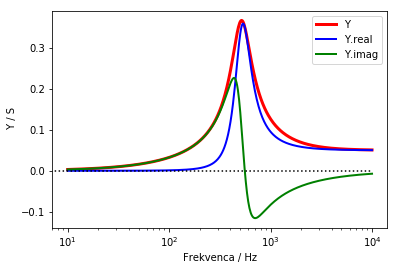

In [88]:
Y=1/Z
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Y / S')
plt.semilogx(freq,abs(Y),label='Y',linewidth=3,color='r')
plt.semilogx(freq,Y.real,label='Y.real',linewidth=2,color='b')
plt.semilogx(freq,Y.imag,label='Y.imag',linewidth=2,color='g')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

Pri nizkih frekvencah prevladuje kapacitivni značaj, saj je imaginarni del pozitiven, torej $j\omega C$, ki ga je potrebno kompenzirati z induktivnostjo $-j \frac{1}{\omega L}$. Pri višjih frekvencah se zadeva obrne. 

Izrišimo potrebne vrednosti L in C za popolno vzporedno kompenzacijo.

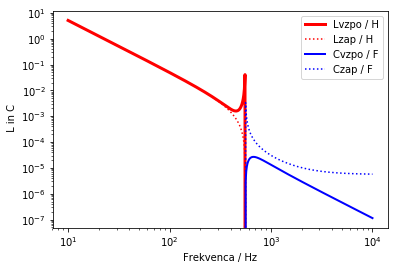

In [89]:
Cvzpo=-Y.imag/omega
Lvzpo=1/(Y.imag*omega)
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' L in C')
plt.loglog(freq,Lvzpo,label='Lvzpo / H',linewidth=3,color='r')
plt.loglog(freq,Lzap,label='Lzap / H',linestyle=':',color='r')
plt.semilogx(freq,Cvzpo,label='Cvzpo / F',linewidth=2,color='b')
plt.semilogx(freq,Czap,label='Czap / F',linestyle=':',color='b')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

**Ugotovitve:** Pri nizkih frekvencah, ko prevladuje kapacitivnost kondenzatorja, je v obeh primerih (tako za vporedno kot zaporedno kompenzacijo) potrebno zagotoviti enko veliko tuljavo. Okoli resonance in višje pa se vrednosti razlikujejo.

Bi znal na enostaven način pokazati (brez grafov), zakaj je temu tako, torej, zakaj sta Lvzpo=Lzap pri nizkih frekvencah?

Še enkat izrišimo moč S vezja po (skupaj z) kompenzaciji. Navzven je sedaj vezje čisto ohmsko, torej je S=P in Q=0.

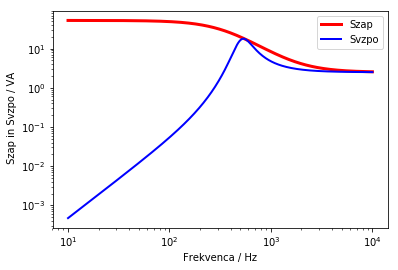

In [90]:
Zzap=Z
Szap=0.5*100/Z.real
Svzpo=0.5*100*Y.real
plt.xlabel('Frekvenca / Hz')
plt.ylabel(' Szap in Svzpo / VA')
plt.loglog(freq,Szap,label='Szap',linewidth=3,color='r')
plt.semilogx(freq,Svzpo,label='Svzpo',linewidth=2,color='b')
plt.plot([0, max(freq)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

**Ugotovitve:** Še enkrat lahko ugotovimo, da je zaporedna kompenzacija namenjena maksimiranju delovne moči, vzporedna pa zmanjšanju tokovnih potreb oz. zmanjšanju trošenja jalove moči iz omrežja.

**Še to:** Morda velja omeniti, da kljub temu, da na prvi pogled opravlja kompenzacija jalove moči zelo koristno vlogo, je potrebno biti pri realizaciji previden. Pri popolni kompenzaciji smo namreč spravili vezje v stanje resonance, napetosti in tokovi znotraj vezja so lahko zelo veliki in povzročijo uničenje ali okvare vezja. Zato se pogosto namesto popolne kompenzacije opravi nepopolna, torej taka, kjer ostane tudi en del imaginarne komponente impedance oz. admitance).

## Maksimalna delovna moč na bremenu - prilagoditev bremena

Tema je podobna, kot smo jo obravnavali v prejšnjem poglavju, kjer smo ugotovili, da z izničenjem oz. kompenzacijo imaginarne komponente impedance dosežemo popolno kompenzacijo jalove moči. Pri tem se poveča tok v vezje (pri napetostnem vzbujanju) in s tem tudi delovno moč na bremenu. Ali je to dejansko največja možna delovna moč, pa je potrebno bolj natančno pogledati.
In sicer tako, da namesto idealnega napetostnega vira vzamemo bolj realističen model vira z notranjo impedanco $\underline Z_g=R_g+jX_g$, ki ga priključimo na breme $\underline Z_b=R_b+jX_b$.

<img src="https://raw.githubusercontent.com/osnove/Slike/master/max_moc.png" style="height:150px">

Delovna moč na bremenu je $P=\frac{1}{2}{{I}^{2}}\operatorname{Re}\left\{ {{\underline{Z}}_{b}} \right\}=\frac{1}{2}{{I}^{2}}{{R}_{b}}$

Če želimo, da bo ta moč maksimalna, je potrebno razdelati enačbo in pogledati

$${{P}_{b}}=\frac{1}{2}{{R}_{b}}\frac{U_{g}^{2}}{{{({{R}_{g}}+{{R}_{b}})}^{2}}+{{({{X}_{g}}+{{X}_{b}})}^{2}}}$$

Očitno bo moč največja, če bo $${{X}_{g}}=-{{X}_{b}}$$ in hkrati $${{R}_{g}}={{R}_{b}} .$$ 

Prvi pogoj smo spoznali že pri zaporedni kompenzaciji jalove moči, drug pogoj pa smo tudi že poznali - iz OE1, saj velja tudi za enosmerna vezja. Naj pri tem opozorimo, da sedaj $R_g$ in $R_b$ nista nujno upora, pač pa predstavljata realni del impedance (X pa imaginarnega).


### Primer analize vezja za prilagoditev bremena viru za prenos maksimalne delovne moči

Vzemimo napetostni vir amplitude 10 V z notranjo impedanco iz vzporedne vezave upora $R=4  \,\Omega$ in kondenzatorja $C=10 \, \mu F$. 

Poiščimo ustrezno impedanco bremena za frekvenco 1 kHz, da bo na njej maksimalna delovna moč. Analizirajmo tudi vpliv posameznih elementov impedance bremena. 

Ker je $X_g$ negativen, bo $X_b$ pozitiven, to pomeni, da mora biti reaktivni element kompenzacije tuljava $X_b=\omega L$.  

In [91]:
## Max delovna moč
U=10
R=4
C=10e-6
freq=1000
omega=2*np.pi*freq

# Določitev impedance Zg
Zc=1/(1j*omega*C)
Zg=1/(1/Zc+1/R)
print(Zg)

# Določitev Zb za P=Pmax
Zb_opt=np.conjugate(Zg)
print(Zb_opt)
Pb_max=U*U/(8*np.real(Zg))  # max delovna moč
print('max delovna moč = ',Pb_max,' W')
Xb_opt=Zb_opt.imag
L_opt=Xb_opt/omega
print('L za P=Pmax je ',L_opt)

(3.7623494364395524-0.9455815479804958j)
(3.7623494364395524+0.9455815479804958j)
max delovna moč =  3.3223920880217874  W
L za P=Pmax je  0.00015049397745758213


V naslednji celici izrišimo spreminjanje velikosti delovne moči ob spreminjanju $R_b$. V določeni točki oz. za določen Rb moramo dobiti maksimalno delovno moč.

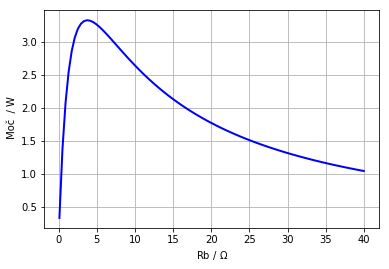

In [92]:
Rb=np.linspace(.1,40,100)  # Niz vrednosti Rb
Zb=Rb+1j*Xb_opt

# Sedaj lahko izračunamo tok v vezje in nato P
I=U/(Zb+Zg)
P=0.5*abs(I)**2*Zb.real

plt.xlabel('Rb / $\Omega$')
plt.ylabel(' Moč  / W')
plt.plot(Rb,P,label='P',linewidth=2,color='b')
plt.grid()
plt.show()

### Zdaj pa ti

1. Pokaži (izriši), da za Rb<<Rg P dobro aproksimira premica, za Rb>>Rg pa parabola 1/Rb. Rešitev je na koncu zvezka.

2. Izriši P za različne vrednosti induktivnosti. Rešitev je na koncu zvezka.

3. Poišči max(P) iz grafa (niza izračunanih vrednosti) in Rb(Pmax) ter primerjaj z eksaktno izračunanim. (Pomagaj si npr. s primerom iz Obravnava_resonancnega_pojava.ipynb, poglavje 2.4) Rešitev je na koncu zvezka.
4. Izriši šop krivulj P za različne frekvence, kjer je na X osi induktivnost. Rešitev je na koncu zvezka.

## Dodatno: Lock-in princip ya detekcijo zašumljenega signala

Recimo, da vemo, da je naš iskani signal sinusne oblike, vendar je določitev amplitude in faze otežena, ker je signal zelo zašumljen. Lock-in metoda temelji na množenju iskanega sinusnega signala z znanim sinusnim signalom in določanjem povprečja. 

Izhajamo iz analize, ki smo jo že opravili pri izračunu moči. Vzemimo, da iščemo amplitudo in fazo toka $i(t)=I_m \sin(\omega t+\varphi)$, ki je "skrit" v šumu. Pomnožimo ta signal z znanim signalom (napetostjo $U=U_m\sin (\omega t )$. Če naredimo povprečje produkta teh dveh signalov dobimo  $X=\frac{{{U}_{m}}{{I}_{m}}}{2}\cos (\varphi )$. Iz znanega X in $U_m$ lahko določimo produkt $I_m \cos \varphi$. Potrebujemo še eno enačbo (meritev), ki jo dobimo z množenjem iskanega signala s kosinusnim signalom, torej z $U=U_m\cos (\omega t )$. Z malo matematike lahko pokažemo, da je tedaj povprečje signala določeno z $Y=\frac{{{U}_{m}}{{I}_{m}}}{2}\sin (\varphi )$. Sedaj imamo vse, kar potrebujemo za določitev amplitude in faze iskanega signala. Če je $U_m=1$ je 

$$I_m^2 =4(X^2+Y^2)$$

in

$$\varphi = \arctan \frac{Y}{X} .$$

Za filtriranje signalov s pomočjo lock-in metode obstajajo posebne naprave - t.i. lock-in ojačevalniki. Včasih so bili ti analogni, dandanes pa se vedno bolj uporabljajo digitalni lock-in ojačevalniki, ki morajo vsebovati predvsem dovolj hitra in natančna analogno-digitalna pretovrnika. 

Morda še to: zakaj se metoda imenuje lock-in? Gre preprosto za to, da imajo analogni lock-in ojačevalniki poseben gumb, s katerim se lahko spreminja fazo znanega (vzbujalnega) signala. Na ta način se fazo "zaklene" v določeno pozicijo relativno glede na iskani signal. Običajno tako, da se jo zaklene kar v pozicijo, kjer je odziv največji, to pa je ravno pri $\varphi=0$.Če nas zanima le amplituda iskanega signala, jo dobimo že z množenjem s sinusnim signalom in nastavitvijo faze na nič.

V spodnji celici poiskusimo proceduro določanja amplitude in faze iskanega izmeničnega signala tako, da vzamemo znan tokovni signal, kateremu dodamo šum in ga poskušamo z lock-in metodo rekonstruirati. Ker temelji metoda na iskanju povprečja signala, je skoraj nujno, da poznamo frekvenco iskanega signala (lahko jo tudi iščemo tam, kjer je največji odziv) in tvorimo niz meritev z večkratnikom te periode. Napako zmanjšamo tudi s tem, da upoštevamo več period signala.

Metodo s pridom uporabljamo pri impedančni spektrokopiji, kjer iščemo impedanco bremena tako, da na breme priključimo znan napetostni signal in merimo tok skozi breme ali obratno. V vsakem primeru moramo čim bolj natančno določiti amplitudo in fazo vzbujalnega signala in odziva, pri čemer si lahko pomagamo z lock-in principom.

Malo več na https://en.wikipedia.org/wiki/Lock-in_amplifier. 

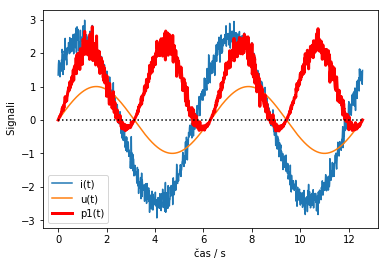

In [93]:
## Zašumljen signal, množenje s sin in cos signalom
Im=2.5 # iskana vrednost
Um=1.0 
omega=1
fi=0.62 # 

# Signal mora biti večkratnik periode
t=np.linspace(0,4*np.pi/omega,1000)

u1=Um*np.sin(omega*t)
u2=Um*np.cos(omega*t)
i=Im*np.sin(omega*t+fi)+0.2*np.random.randn(len(t)) # iskani signal kateremu je dodan šum
p1=u1*i
p2=u2*i

plt.xlabel('čas / s')
plt.ylabel(' Signali')
plt.plot(t,i,label='i(t)')
plt.plot(t,u1,label='u(t)')
plt.plot(t,p1,label='p1(t)',linewidth=3,color='r')

plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

Im =  2.489897226152057
fi =  0.6241290477964204


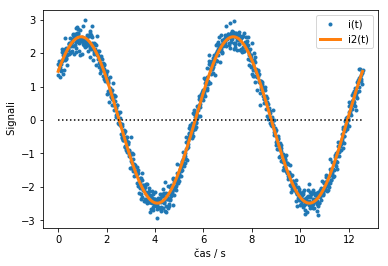

In [94]:
## Določitev i(t) z lock-in metodo
X=np.mean(p1) # povprečna vrednost p1
Y=np.mean(p2)

# Določitev amplitude in faze iskanega signala
Im2=2*np.sqrt(X**2+Y**2) 
fi2=np.arctan(Y/X)

print('Im = ',Im2)
print('fi = ', fi2)

# Izris zašumljenega signala i in določenega signala i2
i2=Im2*np.sin(omega*t+fi2)
plt.xlabel('čas / s')
plt.ylabel(' Signali')
plt.plot(t,i,'.',label='i(t)')
plt.plot(t,i2,label='i2(t)',linewidth=3)

plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

## Rešitve

### Rešitev določanja S, P in Q

Imamo več možnosti. 
1. Iz razlike max in min vrednosti signala dobimo 2S. Nato moramo še poiskati, koliko je sredina krivulje, ki predstavlja povprečno vrednost in s tem delovno moč. To pa dobimo tako, da od S odštejemo abs vrednost od min, kar je enako, kot da min prištejemo k S. Q pa določimo s pomočjo trikotnika moči.
2. S pomočjo funkcije np.mean() izračunamo povprečje signala, ki mora biti enako P. S je potem razlika med max(p)-P. Q dobimo iz trikotnika moči. Vendar pozor. Da bi metoda delovala, mora biti signal dolg točno n period. (Povprečna vrednosti sinusa je 0 samo, če je signal dolg točno eno ali več period). V našem primeru to ni, zato je potrebno zagotoviti, da bo dolžina signala T določena iz pogoja $n 2\pi=\omega T$. Če odkomentirate vrstico 8, bo to veljalo in izračun bo pravilen. 

Kateri način je torej bolj natančen? Hmm, to je težko reči. Za lep idealen signal se kaže bolj uporaben prvi način, če pa si zamislimo zašumljen signal, pa zna biti določitev max in min vrednosti precej nenatančna. Zato se slednji način tudi pogosto uporablja za analizo signalov. Z manjšim dodatkom. V izračunu 2 smo izračunali S iz razlike max(p) in P, kar je ok za lep signal, ne pa za zašumljenega, kjer bi zopet imeli problem določanja max(p). Torej potrebujemo drugačen način določanja. V praksi pogosto uporabljen je tako imenovan lock-in način, ki ga na kratko opisujem v naslednji celici


In [126]:
## Rešitev določanja S, P in Q
S=(np.max(p)-np.min(p))/2
P=S+np.min(p)
Q=np.sqrt(S**2-P**2)
print('izračunane vrednosti S, P in Q so : ',S,P,Q)

# preverim iz znanih vrednosti naključno generiranih amplitud in faze
S=Im*Um/2
P=S*np.cos(fi)
Q=S*np.sin(fi)
print('nastavljene S, P in Q so : ',S, P, Q)
# Razlika v decimalkah je posledica "digitaliziranja" časa pri tvorjenju signala

# Drugi način:
P=np.mean(p)
S=np.max(p)-P
Q=np.sqrt(S**2-P**2)
print('drugi način določitve S, P in Q so : ',S, P, Q)


izračunane vrednosti S, P in Q so :  0.08734807843929322 0.08215973971494166 0.02965575790651725
nastavljene S, P in Q so :  0.08734812209745894 0.08215978246909296 0.02965576804913205
drugi način določitve S, P in Q so :  0.09204269232136093 0.07746512583287395 0.049709269653272124


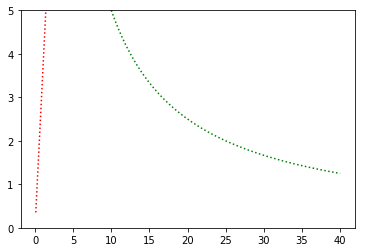

In [455]:
## Rešitev 4.2 aproksimacije s premico in parabolo
# dodamo naslednjo kodo
# premica
I2=U/Zg.real
P2=0.5*abs(I2)**2*Zb.real
plt.plot(Rb,P2,label='P2',linestyle=':',color='r')
plt.ylim(0,5)

## 1/Rb
I3=U/Zb.real
P3=0.5*abs(I3)**2*Zb.real
plt.plot(Rb,P3,label='P3',linestyle=':',color='g')


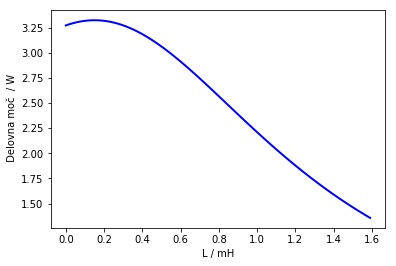

In [10]:
##Rešitev 4.2: izris P za različne induktivnosti
Xb=np.linspace(0,10,100)  # Niz vrednosti Xb
L=Xb/omega
Zb=Zb_opt.real+1j*Xb

# Sedaj lahko izračunamo tok v vezje ali pa računamo s kompleksno admitanco.
I=U/(Zb+Zg)
P=0.5*abs(I)**2*Zb.real

plt.xlabel('L / mH')
plt.ylabel(' Delovna moč  / W')
plt.plot(L*1e3,P,label='P',linewidth=2,color='b')

3.7623494364395524
3.1932000863735888
1.5509065469566052
0.5467059939904362


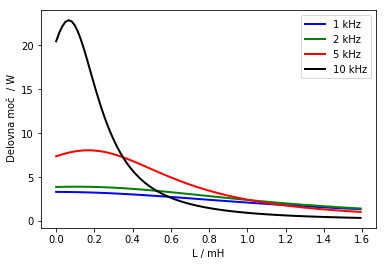

In [37]:
## Rešitev iz 4.2: Max delovna moč  pri različnih frekvencah
U=10
R=4
C=10e-6



def P(freq):
    omega=2*np.pi*freq
    Zc=1/(1j*omega*C)
    Zg=1/(1/Zc+1/R)
    Rb=Zg.real
    Xb=np.linspace(1,10,100)
    Zb=Rb+1j*Xb
    L=Xb/omega
    I=U/(Zb+Zg)
    print(Zg.real)
    return 0.5*abs(I)**2*Zb.real
    
    
plt.xlabel('L / mH')
plt.ylabel(' Delovna moč  / W')
plt.plot(L*1e3,P(1000),label='1 kHz',linewidth=2,color='b')
plt.plot(L*1e3,P(2000),label='2 kHz',linewidth=2,color='g')
plt.plot(L*1e3,P(5000),label='5 kHz',linewidth=2,color='r')
plt.plot(L*1e3,P(10000),label='10 kHz',linewidth=2,color='k')
plt.legend()

# Komentar: max delovna moč se spreminja s frekvenco, ker predstavlja Rg realni del impedance, ki pa je 
# ki je sestavljena iz vzporedne vezave R in C in je zato realni del odvisen tudi od omega*C

In [25]:
## rešitev primera 4.2: iskanje Pmax
indeks=np.where(P== max(P)) # indeksi, kjer je izpolnjen pogoj
print(indeks)
print('Max P na krivulji je ',P[indeks[0]])
print('Max P izračunan je ',Pb_max)

(array([9], dtype=int32),)
Max P na krivulji je  [3.32231921]
Max P izračunan je  3.3223920880217874


# Zaključek

Moč je pomembna v elektrotehniki. Vsaka električna naprava potrebuje za pravilno delovanje ustrezno napajanje, ki mora zagotavljati ustrezno moč. Pri vzbujanju z izmeničnimi signali nas običajno bolj kot trenutna moč zanima povprečna moč, saj je ta relevantna za dolgotrajno delovanje. Ločimo delovno, jalovo in navidezno moč, vse pa so med seboj povezane z znano enačbo za trikotnik moči.

Pomembno je, da razumemo, kako se moč spreminja s časom, da dobimo občutek za to, kaj predstavlja P, Q in S. Za konkretne izračune pa je najprimernejša uporaba kompleksnega računa.

Kompenzacija jalove moči omogoči bolj optimalno delovanje električnih sistemov. Zaporedno kompenzacijo običajno uporabimo za povečanje delovne moči na bremenu, vzporedna pa omogoča delovanje naprav z najmanjšimi izgubami pri enaki vzbujalni napetosti. 

Prilagajanje bremena za doseg maksilne (delovne) moči je mogoče doseči ob pogoju da je $\underline Z_g =\underline Z_b^*$. 

Kot dodatek smo pokazali še možnost uporabe množenja dveh sinusnih signalov za iskanje amplitude in faze enega signala relativno na drugega. To metodo poznamo kot lock-in in se pogosto uporablja tako v analognih specializiranih napravah kot v modernejših digitalnih za izluščenje amplitude (in faze) zašumljenega harmoničnega signala. 


**Naslednje branje:** 